### Noteboook per il calcolo dell'entropia usando il programma python <i>entropy</i>

Calcoliamo l'entropia di stato standard (P=1 atm, T=298.15 K) e l'entropia a una data temperatura *T* (a pressione ambiente) a partire dai dati di calore specifico a pressione costante (misurati a partire da 20 fino a 500K). 

Importiamo nel notebook anche la libreria *inspect* che consente di visualizzare il codice python delle funzioni contenute in *entropy.py*.

In [7]:
import inspect as ins
%matplotlib inline
%run entropy.py

I valori sperimentali del calore specifico sono salvati nella lista Cp_list: uno per ogni valore di temperatura della lista T_list

In [20]:
print("Temperature (K):\n", T_list)
print("\nCalore specifico (J/K mole):\n", Cp_list)

Temperature (K):
 [ 20.    40.    60.    80.   100.   150.   200.   250.   298.15 350.
 400.   500.  ]

Calore specifico (J/K mole):
 [  0.862  11.054  33.631  62.668  94.27  171.54  235.85  286.48  325.31
 359.03  385.8   422.8  ]


Volendo visualizzare meglio la lista dei valori T/Cp si può ricorrere alla libreria *pandas* (che è già importata all'interno di *entropy.py* con l'alias *pd*) si procede nel seguente modo:

- si costruisce una lista delle due liste, a cui diamo il nome di *serie*
- riconfezioniamo *serie* nella forma di un *dataframe* Pandas, specificando i nomi da attribuire alle righe

In [38]:
serie=(T_list,Cp_list)
df=pd.DataFrame(serie, index=['Temp','Cp_exp'])

Si stampa il dataframe eliminando (opzionalmente) la numerazione delle colonne con *header=False*)

In [39]:
print(df.to_string(header=False))

Temp    20.000  40.000  60.000  80.000  100.00  150.00  200.00  250.00  298.15  350.00  400.0  500.0
Cp_exp   0.862  11.054  33.631  62.668   94.27  171.54  235.85  286.48  325.31  359.03  385.8  422.8


Facciamo un fit del calore specifico in funzione della temperatura, usando la funzione *fit*; il fit è fatto sulla base di una polinomiale del tipo:

$$C_P(T)=aT+bT^{-1}+cT^2+dT^{-2}+eT^{0.5}+fT^{-0.5}$$

I valori delle potenze sono già contenuti nella funzione *Cp* che calcola il calore specifico a una data *T*:

In [46]:
print(ins.getsource(Cp))

def Cp(T,*par):
    cp=par[0]+par[1]*T + par[2]*T**(-1) + par[3]*T**2 + \
       par[4]*T**(-2) + par[5]*T**0.5 + par[6]*T**(-0.5)
    return cp



In [47]:
print(ins.getsource(fit))

def fit(prt=True):
    par=reg.par
    opt,err=curve_fit(Cp, T_list, Cp_list, p0=par)
    reg.set(opt)
    if prt:
       reg.out()



il fit è fatto usando la funzione *curve_fit* della libreria *scipy.optimize* [qui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) la documentazione generale. *curve_fit* vuole come argomenti 

- il nome della funzione da usarsi per il fit (*Cp*)
- la lista dei valori della variabile indipendente (*T_list*)
- la lista dei valori della variabile dipendente (*Cp_list*)
- un *guess* iniziale per i parametri da ottimizzare (*p0=par* : parametri iniziali che sono stati tutti posti al valore di 1). 

I valori ottimizzati dei coefficienti della polinomiale sono restituiti da *curve_fit* nella lista *opt* (la lista *err* contiene le corrispondenti deviazioni standard) e sono salvati nella variabile *reg.par* (istanza della classe fpar) usando il metodo *.set*  

In [48]:
fit()

Stored parameters of the Cp function
parameter 0, value: -2.8925e+03
parameter 1, value: -5.5659e+00
parameter 2, value: -3.3466e+04
parameter 3, value: 1.3063e-03
parameter 4, value: 6.4400e+04
parameter 5, value: 2.2991e+02
parameter 6, value: 1.5600e+04


Usando il polinomio ottimizzato, ci si può calcolare il calore specifico a qualsiasi temperatura con la funzione *Cp* passandogli oltre al valore di temperatura, anche la lista dei coefficienti conservata in *reg.par*:

In [51]:
Cp(300,*reg.par)

327.2260236965142

Si noti l'uso dell'asterisco che precede il nome *reg.par*: specifica il passaggio alla funzione *Cp* di una lista di valori di lunghezza arbitraria.

Usiamo la funzione *check_cp* per visualizzare i risultati del fit. Il codice della funzione è:

In [50]:
print(ins.getsource(check_cp))

def check_cp():
    delta=1.
    Tmin=min(T_list)-delta
    Tmax=max(T_list)+delta
    npoint=100
    if Tmin < 0.5:
        Tmin=0.5
        
    T_plot=np.linspace(Tmin,Tmax,npoint)
    Cp_plot=Cp(T_plot,*reg.par)
    
    plt.figure()
    plt.plot(T_plot,Cp_plot,"k-",label="Cp fit")
    plt.plot(T_list, Cp_list,"k*",label="Cp exp")
    plt.xlabel("T (K)")
    plt.ylabel("Cp (J/mol K)")
    plt.legend(frameon=False)
    plt.title("Calore specifico a pressione costante")
    plt.show()
    
    Cp_fit=np.array([])
    for it in T_list:
        icp=Cp(it,*reg.par)
        Cp_fit=np.append(Cp_fit,icp)
    
    delta=Cp_list-Cp_fit
# Stampa di una tabella di valori T, Cp_exp, Cpfit e delta,
# usando le funzioni della libreria Pandas
    serie=(T_list,Cp_list,Cp_fit,delta)
    df=pd.DataFrame(serie, index=['T','Cp_exp','Cp_fit','delta'])
    df=df.T
    df2=df.round(3)
    print("")
    print(df2.to_string(index=False))   



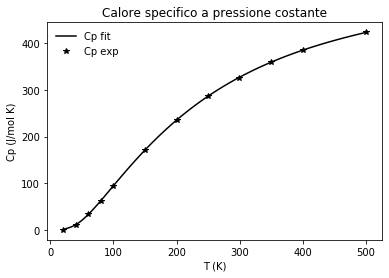


      T   Cp_exp   Cp_fit  delta
  20.00    0.862    0.855  0.007
  40.00   11.054   11.192 -0.138
  60.00   33.631   33.173  0.458
  80.00   62.668   62.806 -0.138
 100.00   94.270   94.818 -0.548
 150.00  171.540  171.264  0.276
 200.00  235.850  235.308  0.542
 250.00  286.480  286.608 -0.128
 298.15  325.310  325.887 -0.577
 350.00  359.030  359.382 -0.352
 400.00  385.800  385.022  0.778
 500.00  422.800  422.980 -0.180


In [52]:
check_cp()

La funzione *entropia* calcola appunto l'entropia a una data temperatura, attraverso l'integrale

$$S(T)=\int_{0}^{T}\frac{C_P(T)}{T}\,\mathrm dT$$

La funzione integranda $C_P/T$ è la funzione *integrand* del programma. La funzione *entropia* calcola l'integrale su scritto usando la funzione *quad* della libreria *scipy.integrate* (la documentazione la trovate [qui]( https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)).

La sintassi di *quad* vuole come input:

- il nome della funzione integranda 
- i limiti di integrazione (qui poniamo il minimo al valore di 10, per evitare problemi di divergenza della funzione integranda)
- gli altri parametri, oltre alla variabile *T* di cui la funzione integranda necessita: questi sono i coefficienti della polinomiale contenuti in *reg.par* (e si specificano usando *args=reg.par*)

*quad* restituisce i risultati del calcolo in una lista di cui il primo elemento (quello con indice 0) è il valore dell'integrale. Quindi salviamo l'output di *quad* nella variabile *ent*; la funzione *entropia* restituisce il valore ent\[0\].

In [53]:
print(ins.getsource(integrand))
print(ins.getsource(entropia))

def integrand(T,par):
    return Cp(T,*par)/T

def entropia(T):
    ent=quad(integrand, 10, T, args=reg.par)
    return ent[0]



Per esempio, calcoliamo l'integrale:

$$I=\int_{0}^{5}x^2\,\mathrm dx$$

Scriviamo la funzione integranda (*myfunc*) in modo che restituisca il valore di $x^{deg}$ dati $x$ e *deg*; quindi calcoliamo l'integrale e salviamo il risultato nella variabile *integ*:

In [54]:
def myfunc(x,d):
    return x**d

deg=2
integ=quad(myfunc,0,5,args=deg)

*integ* è una lista di 2 valori: il valore dell'integrale e la stima dell'errore di integrazione; il valore dell'integrale è il primo elemento della lista (python *indicizza* le liste a partire dal valore 0 e non 1...)

In [61]:
print(integ)
print("\nValore dell'integrale %5.3f:" % integ[0])

(41.66666666666666, 4.625929269271485e-13)

Valore dell'integrale 41.667:


Calcoliamo l'entropia a 400 K:

In [64]:
entropia(400)

371.04666644640537

Possiamo fare un plot dell'entropia in funzione della temperatura, usando la funzione *plot_entropy*, il cui codice è:

In [66]:
print(ins.getsource(plot_entropy))

def plot_entropy(T):
    T_plot=np.linspace(10,T,100)
    E_plot=np.array([])
    for it in T_plot:
        ie=entropia(it)
        E_plot=np.append(E_plot,ie)
        
    plt.figure()
    plt.plot(T_plot,E_plot)
    plt.xlabel("T (K)")
    plt.ylabel("S (J/mole K)")
    plt.title("Entropia in funzione di T")
    plt.show()



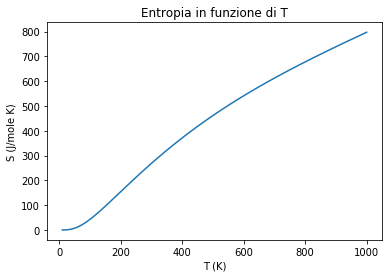

In [65]:
plot_entropy(1000)

Tutte le funzioni viste sopra possono essere richiamate in sequenza usando la funzione *start*:

In [67]:
print(ins.getsource(start))

def start(T):
    fit(prt=False)
    check_cp()
    plot_entropy(T)
    ent_st=entropia(298)
    print("\nEntropia di stato standard: %6.2f J/mole K" % ent_st)



Come si vede, la funzione *start* esegue il fit del $C_P$, lo visualizza, fa un plot dell'entropia e calcola l'entropia alla temperatura standard:

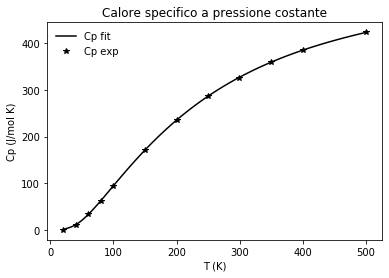


      T   Cp_exp   Cp_fit  delta
  20.00    0.862    0.855  0.007
  40.00   11.054   11.192 -0.138
  60.00   33.631   33.173  0.458
  80.00   62.668   62.806 -0.138
 100.00   94.270   94.818 -0.548
 150.00  171.540  171.264  0.276
 200.00  235.850  235.308  0.542
 250.00  286.480  286.608 -0.128
 298.15  325.310  325.887 -0.577
 350.00  359.030  359.382 -0.352
 400.00  385.800  385.022  0.778
 500.00  422.800  422.980 -0.180


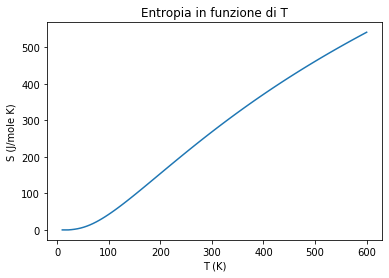


Entropia di stato standard: 266.18 J/mole K


In [68]:
start(600)